In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

Description des données :
Ce dataset contient des informations sur quatre demandeurs de prêt différents. Chaque entrée comprend des informations telles que l'identifiant du prêt, le sexe, l'état civil, les personnes à charge, le niveau d'études, le statut d'indépendant, les revenus du demandeur, les revenus du codemandeur, le montant du prêt, la durée du prêt, l'historique de crédit et la superficie du bien.

In [2]:
loan_df = pd.read_csv('Merged_Loan_Dataset.csv')
loan_df = loan_df.drop(columns=['Set'])
loan_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [4]:
# Variables continues
continuous_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


discrete_vars = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                 'Property_Area', 'Loan_Status', 'Set']

print("Variables continues:", continuous_vars)
print("Variables discrètes:", discrete_vars)

Variables continues: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Variables discrètes: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Set']


Analyse univariée variables continues

In [5]:
loan_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


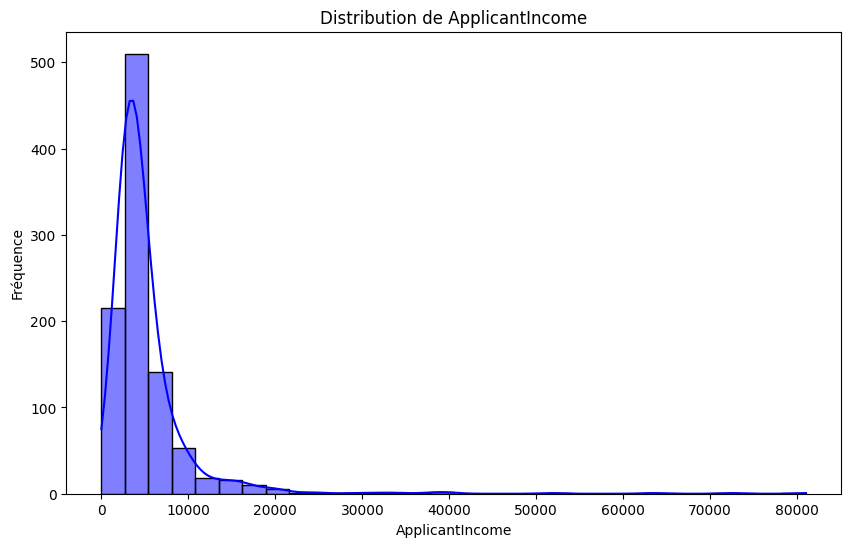

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution de ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Fréquence')
plt.show()

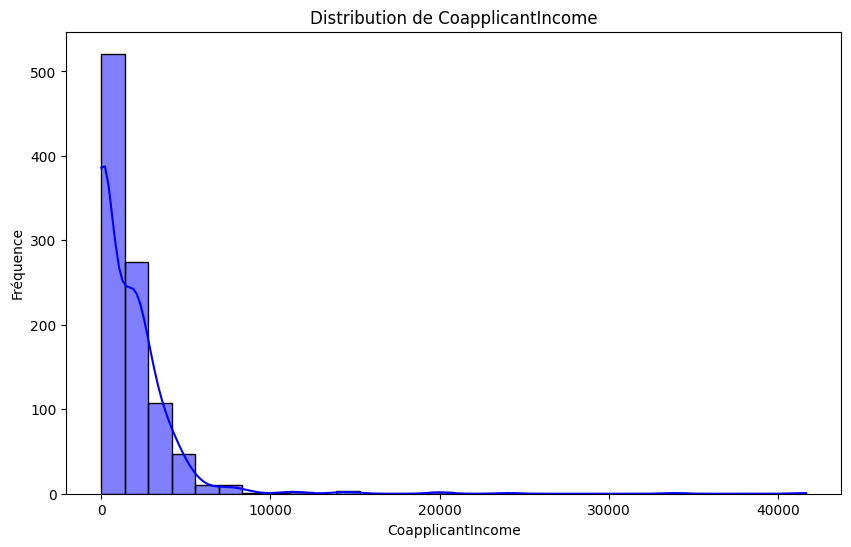

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['CoapplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution de CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Fréquence')
plt.show()

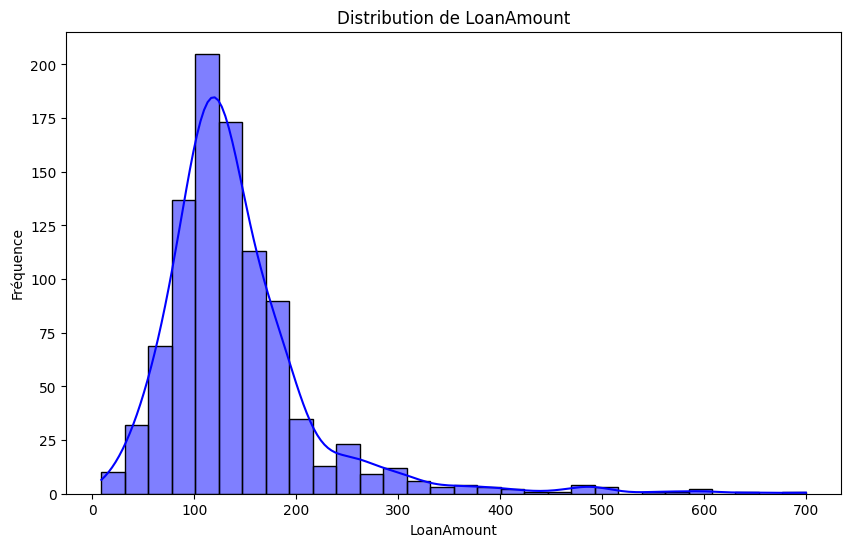

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['LoanAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution de LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Fréquence')
plt.show()

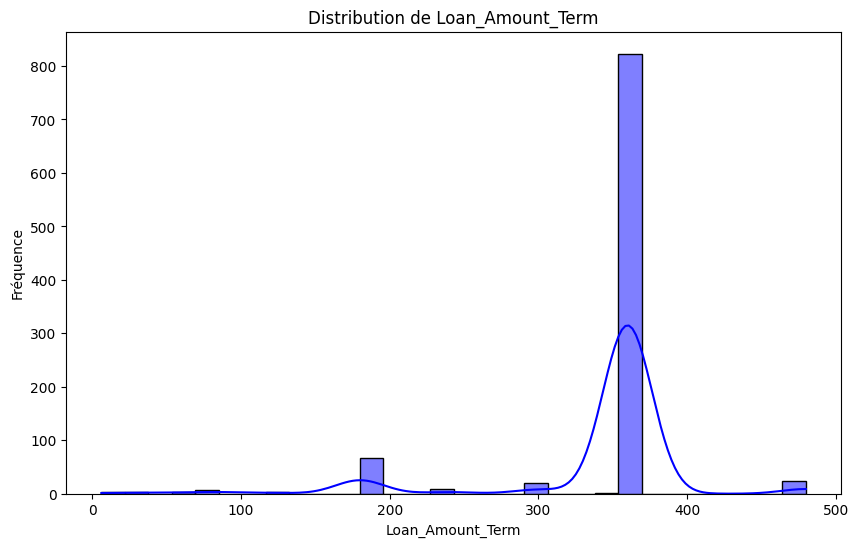

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['Loan_Amount_Term'], kde=True, bins=30, color='blue')
plt.title('Distribution de Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Fréquence')
plt.show()

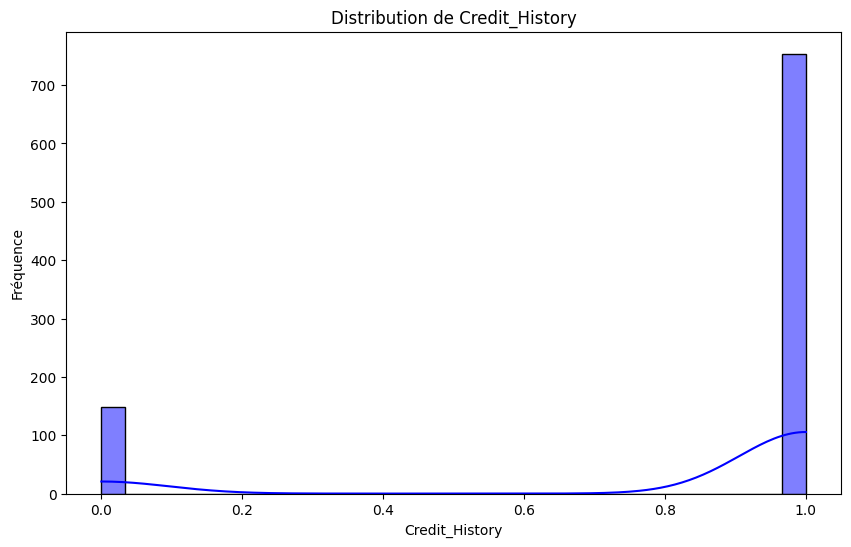

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['Credit_History'], kde=True, bins=30, color='blue')
plt.title('Distribution de Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Fréquence')
plt.show()

Analyse univariée variables Discrètes

Gender
Male      775
Female    182
Name: count, dtype: int64


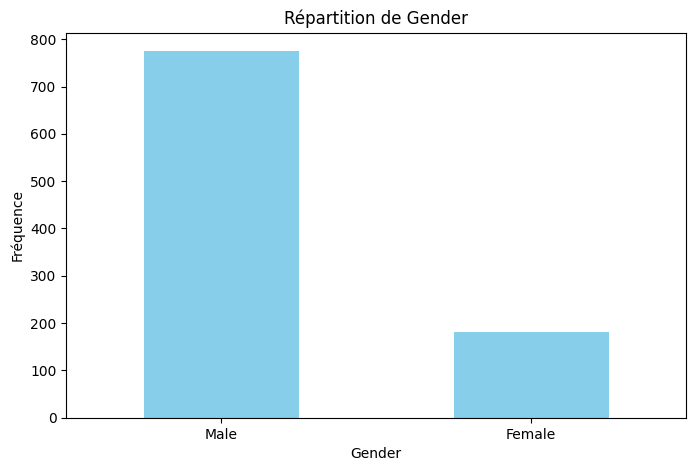

In [11]:
gender_counts = loan_df['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Gender')
plt.xlabel('Gender')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Married
Yes    631
No     347
Name: count, dtype: int64


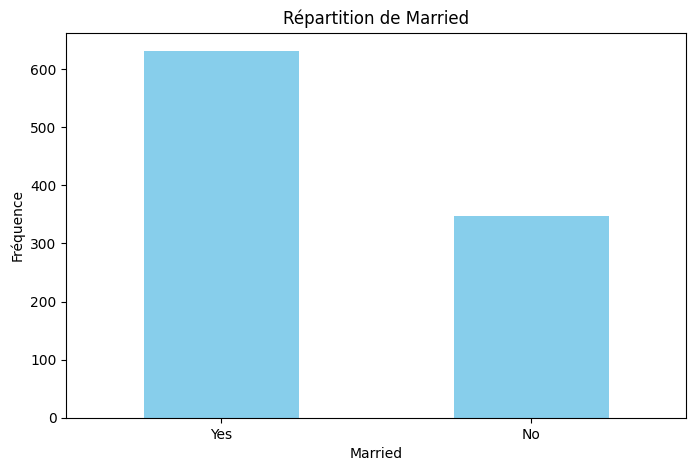

In [12]:
married_counts = loan_df['Married'].value_counts()
print(married_counts)

plt.figure(figsize=(8, 5))
married_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Married')
plt.xlabel('Married')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()


Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64


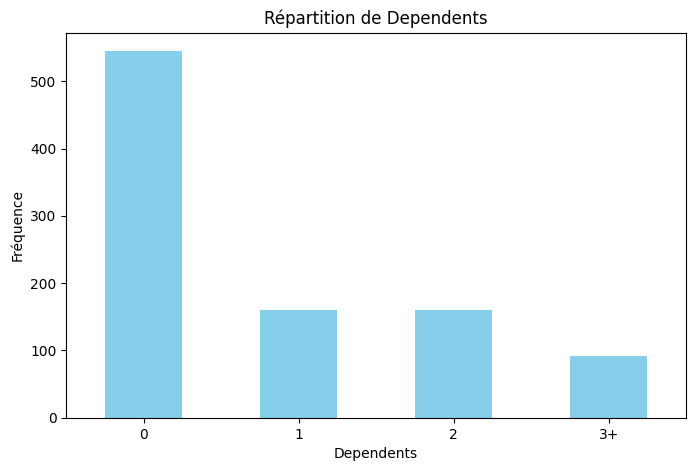

In [13]:

Dependents_counts = loan_df['Dependents'].value_counts()
print(Dependents_counts)

plt.figure(figsize=(8, 5))
Dependents_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Dependents')
plt.xlabel('Dependents')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64


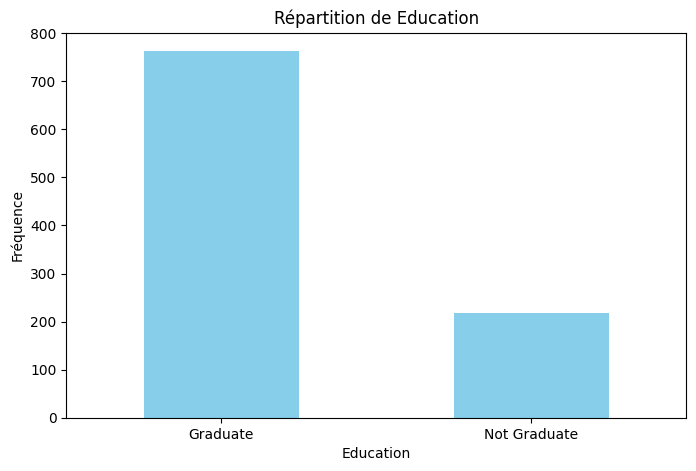

In [14]:

Education_counts = loan_df['Education'].value_counts()
print(Education_counts)

plt.figure(figsize=(8, 5))
Education_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Education')
plt.xlabel('Education')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Self_Employed
No     807
Yes    119
Name: count, dtype: int64


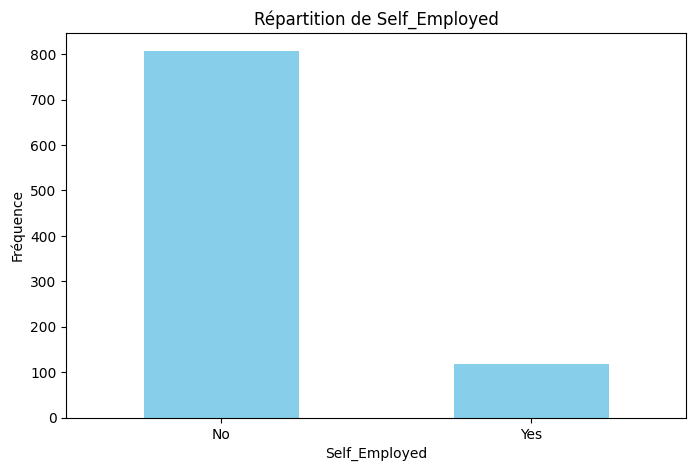

In [15]:
Self_Employed_counts = loan_df['Self_Employed'].value_counts()
print(Self_Employed_counts)

plt.figure(figsize=(8, 5))
Self_Employed_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64


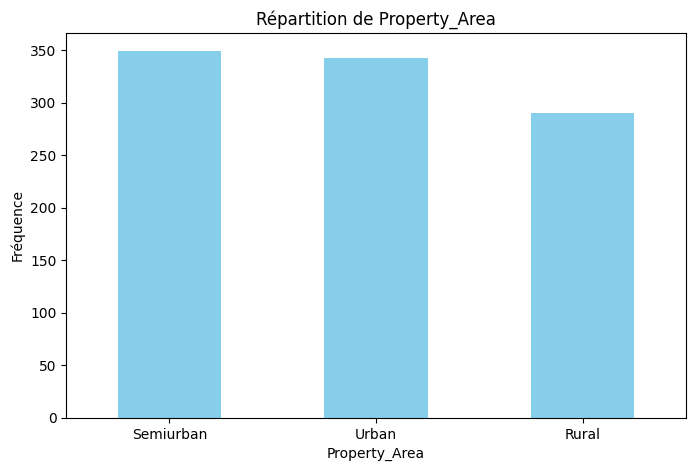

In [16]:
Property_Area_counts = loan_df['Property_Area'].value_counts()
print(Property_Area_counts)

plt.figure(figsize=(8, 5))
Property_Area_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


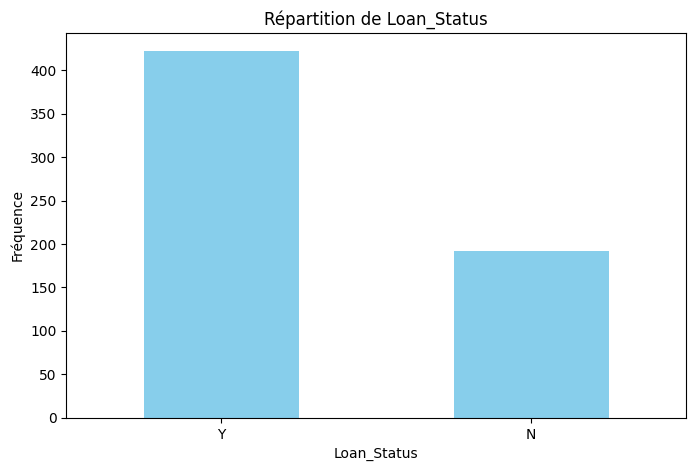

In [17]:
Loan_Status_counts = loan_df['Loan_Status'].value_counts()
print(Loan_Status_counts)

plt.figure(figsize=(8, 5))
Loan_Status_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition de Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

Analyse Multivariée Variable Discrète-discrète

In [18]:
# Tableau de contingence entre 'Gender' et 'Married'
contingency_gender_married = pd.crosstab(loan_df['Gender'], loan_df['Married'])
print(contingency_gender_married)

Married   No  Yes
Gender           
Female   124   57
Male     212  561


In [19]:
# Tableau de contingence entre 'Gender' et 'Dependents'
contingency_gender_dependents = pd.crosstab(loan_df['Gender'], loan_df['Dependents'])
print(contingency_gender_dependents)

Dependents    0    1    2  3+
Gender                       
Female      123   32   13   9
Male        408  125  145  78


In [20]:
# Tableau de contingence entre 'Gender' et 'Education'
contingency_gender_education = pd.crosstab(loan_df['Gender'], loan_df['Education'])
print(contingency_gender_education)

Education  Graduate  Not Graduate
Gender                           
Female          148            34
Male            596           179


In [21]:
# Tableau de contingence entre 'Gender' et 'Self_Employed'
contingency_gender_self_employed = pd.crosstab(loan_df['Gender'], loan_df['Self_Employed'])
print(contingency_gender_self_employed)

Self_Employed   No  Yes
Gender                 
Female         152   19
Male           637   94


In [22]:
# Tableau de contingence entre 'Gender' et 'Property_Area'
contingency_gender_property_area = pd.crosstab(loan_df['Gender'], loan_df['Property_Area'])
print(contingency_gender_property_area)

Property_Area  Rural  Semiurban  Urban
Gender                                
Female            42         82     58
Male             241        256    278


In [23]:
# Tableau de contingence entre 'Gender' et 'Loan_Status'
contingency_gender_loan_status = pd.crosstab(loan_df['Gender'], loan_df['Loan_Status'])
print(contingency_gender_loan_status)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


In [24]:
# Tableau de contingence entre 'Married' et 'Education'
contingency_married_education = pd.crosstab(loan_df['Married'], loan_df['Education'])
print(contingency_married_education)

Education  Graduate  Not Graduate
Married                          
No              275            72
Yes             485           146


In [25]:
# Tableau de contingence entre 'Married' et 'Self_Employed'
contingency_married_self_employed = pd.crosstab(loan_df['Married'], loan_df['Self_Employed'])
print("Tableau de contingence entre Married et Self_Employed:\n")
print(contingency_married_self_employed)

Tableau de contingence entre Married et Self_Employed:

Self_Employed   No  Yes
Married                
No             286   40
Yes            518   79


In [26]:
# Tableau de contingence entre 'Married' et 'Property_Area'
contingency_married_property_area = pd.crosstab(loan_df['Married'], loan_df['Property_Area'])
print("Tableau de contingence entre Married et Property_Area:\n")
print(contingency_married_property_area)

Tableau de contingence entre Married et Property_Area:

Property_Area  Rural  Semiurban  Urban
Married                               
No               103        125    119
Yes              187        222    222


In [27]:
# Tableau de contingence entre 'Married' et 'Loan_Status'
contingency_married_loan_status = pd.crosstab(loan_df['Married'], loan_df['Loan_Status'])
print("Tableau de contingence entre Married et Loan_Status:\n")
print(contingency_married_loan_status)

Tableau de contingence entre Married et Loan_Status:

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


In [28]:
# Tableau de contingence entre 'Dependents' et 'Education'
contingency_dependents_education = pd.crosstab(loan_df['Dependents'], loan_df['Education'])
print("Tableau de contingence entre Dependents et Education:\n")
print(contingency_dependents_education)

Tableau de contingence entre Dependents et Education:

Education   Graduate  Not Graduate
Dependents                        
0                435           110
1                128            32
2                118            42
3+                62            29


In [29]:
# Tableau de contingence entre 'Dependents' et 'Self_Employed'
contingency_dependents_self_employed = pd.crosstab(loan_df['Dependents'], loan_df['Self_Employed'])
print("Tableau de contingence entre Dependents et Self_Employed:\n")
print(contingency_dependents_self_employed)

Tableau de contingence entre Dependents et Self_Employed:

Self_Employed   No  Yes
Dependents             
0              460   59
1              121   25
2              129   21
3+              75   11


In [30]:
# Tableau de contingence entre 'Dependents' et 'Property_Area'
contingency_dependents_property_area = pd.crosstab(loan_df['Dependents'], loan_df['Property_Area'])
print("Tableau de contingence entre Dependents et Property_Area:\n")
print(contingency_dependents_property_area)

Tableau de contingence entre Dependents et Property_Area:

Property_Area  Rural  Semiurban  Urban
Dependents                            
0                172        192    181
1                 39         60     61
2                 51         52     57
3+                25         34     32


In [31]:
# Tableau de contingence entre 'Dependents' et 'Loan_Status'
contingency_dependents_loan_status = pd.crosstab(loan_df['Dependents'], loan_df['Loan_Status'])
print("Tableau de contingence entre Dependents et Loan_Status:\n")
print(contingency_dependents_loan_status)

Tableau de contingence entre Dependents et Loan_Status:

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


Analyse Multivariée Variable Continue - continue

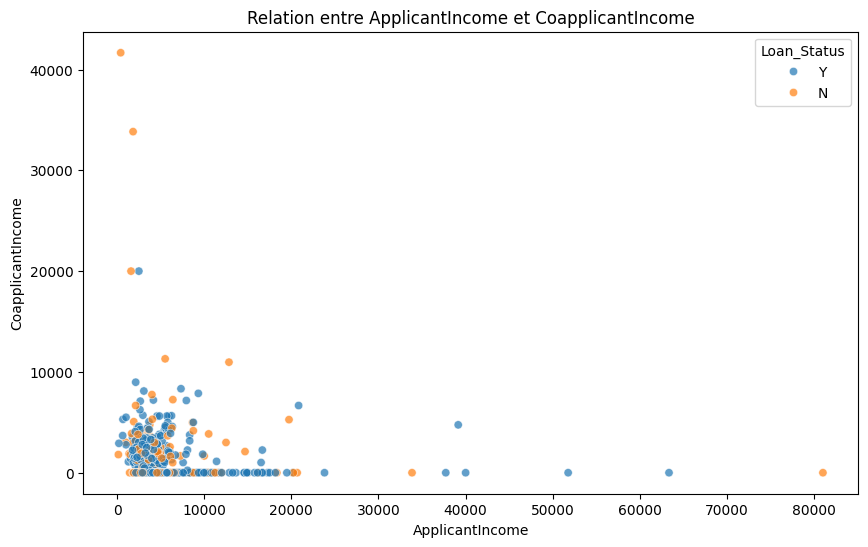

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_df, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status', alpha=0.7)
plt.title('Relation entre ApplicantIncome et CoapplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.legend(title='Loan_Status')
plt.show()

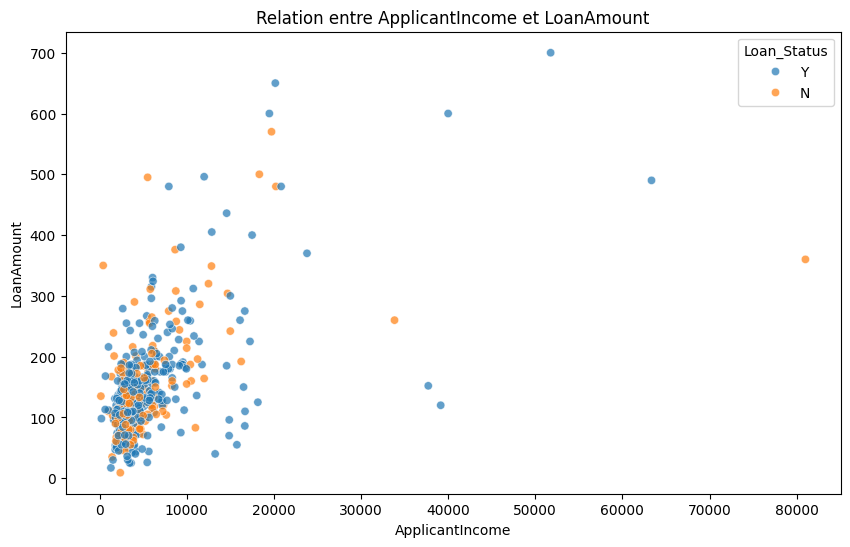

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7)
plt.title('Relation entre ApplicantIncome et LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend(title='Loan_Status')
plt.show()

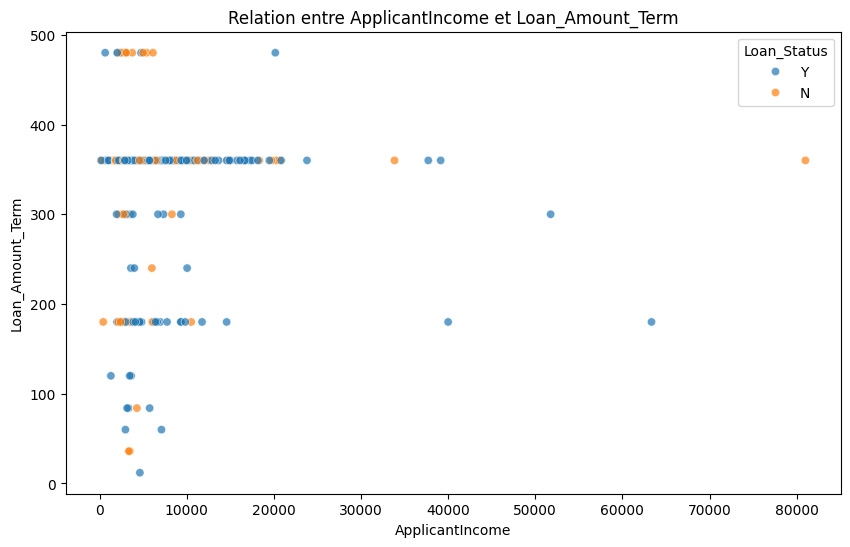

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_df, x='ApplicantIncome', y='Loan_Amount_Term', hue='Loan_Status', alpha=0.7)
plt.title('Relation entre ApplicantIncome et Loan_Amount_Term')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Amount_Term')
plt.legend(title='Loan_Status')
plt.show()

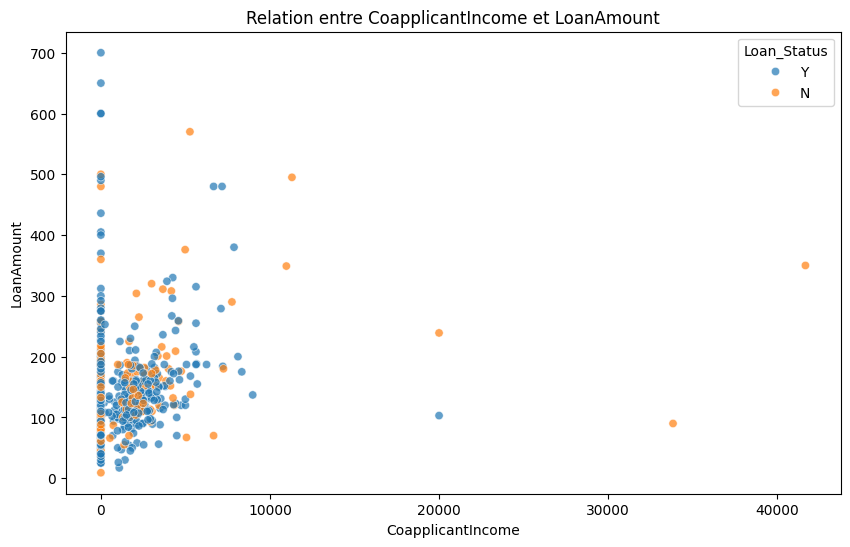

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_df, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7)
plt.title('Relation entre CoapplicantIncome et LoanAmount')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.legend(title='Loan_Status')
plt.show()

Analyse Multivariée Variable Discrète - Continu

In [36]:
# Moyenne de ApplicantIncome groupée par Gender
grouped_gender_applicant_income = loan_df.groupby('Gender')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Gender:\n", grouped_gender_applicant_income)


Moyenne de ApplicantIncome groupée par Gender:
 Gender
Female    4458.906593
Male      5256.925161
Name: ApplicantIncome, dtype: float64


In [37]:
# Moyenne de ApplicantIncome groupée par Married
grouped_married_applicant_income = loan_df.groupby('Married')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Married:\n", grouped_married_applicant_income)


Moyenne de ApplicantIncome groupée par Married:
 Married
No     4778.731988
Yes    5395.464342
Name: ApplicantIncome, dtype: float64


In [38]:
# Moyenne de ApplicantIncome groupée par Dependents
grouped_dependents_applicant_income = loan_df.groupby('Dependents')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Dependents:\n", grouped_dependents_applicant_income)


Moyenne de ApplicantIncome groupée par Dependents:
 Dependents
0     4706.222018
1     5534.100000
2     4907.162500
3+    7865.197802
Name: ApplicantIncome, dtype: float64


In [39]:
# Moyenne de ApplicantIncome groupée par Education
grouped_education_applicant_income = loan_df.groupby('Education')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Education:\n", grouped_education_applicant_income)


Moyenne de ApplicantIncome groupée par Education:
 Education
Graduate        5602.440367
Not Graduate    3700.536697
Name: ApplicantIncome, dtype: float64


In [40]:
# Moyenne de ApplicantIncome groupée par Self_Employed
grouped_self_employed_applicant_income = loan_df.groupby('Self_Employed')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Self_Employed:\n", grouped_self_employed_applicant_income)


Moyenne de ApplicantIncome groupée par Self_Employed:
 Self_Employed
No     4892.030979
Yes    6912.579832
Name: ApplicantIncome, dtype: float64


In [41]:
# Moyenne de ApplicantIncome groupée par Property_Area
grouped_property_area_applicant_income = loan_df.groupby('Property_Area')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Property_Area:\n", grouped_property_area_applicant_income)


Moyenne de ApplicantIncome groupée par Property_Area:
 Property_Area
Rural        5178.924138
Semiurban    5110.593123
Urban        5251.152047
Name: ApplicantIncome, dtype: float64


In [42]:
# Moyenne de ApplicantIncome groupée par Loan_Status
grouped_loan_status_applicant_income = loan_df.groupby('Loan_Status')['ApplicantIncome'].mean()
print("\nMoyenne de ApplicantIncome groupée par Loan_Status:\n", grouped_loan_status_applicant_income)


Moyenne de ApplicantIncome groupée par Loan_Status:
 Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


Tests Statistiques 

Variable continue

H0 : Il n'y a pas de différence significative de revenu moyen entre les genres (Gender).

H1 : Il existe une différence significative de revenu moyen selon le genre.

In [43]:
# Filtrer les revenus moyens par genre
male_income = loan_df[loan_df['Gender'] == 'Male']['ApplicantIncome'].dropna()
female_income = loan_df[loan_df['Gender'] == 'Female']['ApplicantIncome'].dropna()

# Effectuer le test t de Student
t_stat, p_value = ttest_1samp(male_income, female_income.mean())
print(f"Test t pour la différence de revenu moyen entre les genres : t_stat={t_stat}, p_value={p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Nous rejetons H0 : Il existe une différence significative de revenu moyen selon le genre.")
else:
    print("Nous ne rejetons pas H0 : Il n'y a pas de différence significative de revenu moyen entre les genres.")

Test t pour la différence de revenu moyen entre les genres : t_stat=3.8048632707920738, p_value=0.00015307415494448186
Nous rejetons H0 : Il existe une différence significative de revenu moyen selon le genre.


Hypothèse:
Comparaison entre les groupes Married : Le revenu moyen des co-applicants varie-t-il en fonction du mariage ?

In [44]:
# Filtrer les revenus des co-applicants par statut marital
married_income = loan_df[loan_df['Married'] == 'Yes']['CoapplicantIncome'].dropna()
not_married_income = loan_df[loan_df['Married'] == 'No']['CoapplicantIncome'].dropna()

# Effectuer le test t de Student
t_stat, p_value = ttest_1samp(married_income, not_married_income.mean())
print(f"Test t pour la différence de revenu moyen des co-applicants selon le statut marital : t_stat={t_stat}, p_value={p_value}")

# Interprétation des résultats
if p_value < alpha:
    print("Nous rejetons H0 : Il existe une différence significative de revenu moyen des co-applicants selon le statut marital.")
else:
    print("Nous ne rejetons pas H0 : Il n'y a pas de différence significative de revenu moyen des co-applicants selon le statut marital.")

Test t pour la différence de revenu moyen des co-applicants selon le statut marital : t_stat=4.556285087144296, p_value=6.253926667407774e-06
Nous rejetons H0 : Il existe une différence significative de revenu moyen des co-applicants selon le statut marital.


Hypothèses :
H0 : Il n'y a pas de différence significative des revenus moyens (ApplicantIncome) entre les différentes zones (Property_Area).
H1 : Il existe une différence significative des revenus moyens (ApplicantIncome) entre au moins deux zones (Property_Area).


In [45]:
# ANOVA pour ApplicantIncome selon Property_Area
anova_applicant_income_property_area = f_oneway(
    loan_df[loan_df['Property_Area'] == 'Rural']['ApplicantIncome'].dropna(),
    loan_df[loan_df['Property_Area'] == 'Semiurban']['ApplicantIncome'].dropna(),
    loan_df[loan_df['Property_Area'] == 'Urban']['ApplicantIncome'].dropna()
)

# Résultats
print(f"ANOVA ApplicantIncome selon Property_Area: F-stat={anova_applicant_income_property_area.statistic}, p-value={anova_applicant_income_property_area.pvalue}")

# Interprétation des résultats
alpha = 0.05
if anova_applicant_income_property_area.pvalue < alpha:
    print("Nous rejetons H0 : Il existe une différence significative des revenus moyens entre au moins deux zones.")
else:
    print("Nous ne rejetons pas H0 : Il n'y a pas de différence significative des revenus moyens entre les zones.")

ANOVA ApplicantIncome selon Property_Area: F-stat=0.052511701762204537, p-value=0.9488458929364225
Nous ne rejetons pas H0 : Il n'y a pas de différence significative des revenus moyens entre les zones.


In [46]:
# ANOVA pour LoanAmount selon Education
anova_loan_amount_education = f_oneway(
    loan_df[loan_df['Education'] == 'Graduate']['LoanAmount'].dropna(),
    loan_df[loan_df['Education'] == 'Not Graduate']['LoanAmount'].dropna()
)

# Résultats
print(f"ANOVA LoanAmount selon Education: F-stat={anova_loan_amount_education.statistic}, p-value={anova_loan_amount_education.pvalue}")

# Interprétation des résultats
alpha = 0.05
if anova_loan_amount_education.pvalue < alpha:
    print("Nous rejetons H0 : Il existe une différence significative entre les moyennes de LoanAmount pour les groupes Graduate et Not Graduate.")
else:
    print("Nous ne rejetons pas H0 : Il n'y a pas de différence significative entre les moyennes de LoanAmount pour les groupes Graduate et Not Graduate.")

ANOVA LoanAmount selon Education: F-stat=26.66127740899539, p-value=2.951787361978721e-07
Nous rejetons H0 : Il existe une différence significative entre les moyennes de LoanAmount pour les groupes Graduate et Not Graduate.


Train-test dataset

In [47]:
from sklearn.model_selection import train_test_split

# Séparation des données en train et test
train_df, test_df = train_test_split(loan_df, test_size=0.3, random_state=42)

# Affichage des dimensions des ensembles
print(f"Train set dimensions: {train_df.shape}")
print(f"Test set dimensions: {test_df.shape}")

Train set dimensions: (686, 13)
Test set dimensions: (295, 13)


PREPROCESSING

1. Valeurs manquantes :
- Colonne	Type	Stratégie proposée
Loan_Status	Categorical	Ne rien faire (certainement données test)
Credit_History	Numérique	Imputation par mode (binaire : 0 ou 1)
Self_Employed	Catégorielle	Imputation par mode
LoanAmount	Numérique	Imputation par médiane
Dependents	Catégorielle	Imputation par mode
Gender	Catégorielle	Imputation par mode
Loan_Amount_Term	Numérique	Imputation par médiane
Married	Catégorielle	Imputation par mode

In [48]:
nan_counts = train_df.isna().sum()
print(nan_counts)

Loan_ID                0
Gender                13
Married                3
Dependents            17
Education              0
Self_Employed         40
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            21
Loan_Amount_Term      15
Credit_History        52
Property_Area          0
Loan_Status          265
dtype: int64


Train dataset

In [49]:
# Séparer les variables numériques et catégoriques pour le train dataset
train_numerical_vars = train_df.select_dtypes(include=['float64', 'int64'])
train_categorical_vars = train_df.select_dtypes(include=['object'])

# Séparer les variables numériques et catégoriques pour le test dataset
test_numerical_vars = test_df.select_dtypes(include=['float64', 'int64'])
test_categorical_vars = test_df.select_dtypes(include=['object'])

# Affichage des résultats
print("Variables numériques dans le train dataset :")
print(train_numerical_vars.head())

print("\nVariables catégoriques dans le train dataset :")
print(train_categorical_vars.head())

print("\nVariables numériques dans le test dataset :")
print(test_numerical_vars.head())

print("\nVariables catégoriques dans le test dataset :")
print(test_categorical_vars.head())

Variables numériques dans le train dataset :
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
572            16666                0.0       275.0             360.0   
849             2231             2774.0       176.0             360.0   
906             3271                0.0        90.0             360.0   
432            12876                0.0       405.0             360.0   
228             4758                0.0       158.0             480.0   

     Credit_History  
572             1.0  
849             0.0  
906             1.0  
432             1.0  
228             1.0  

Variables catégoriques dans le train dataset :
      Loan_ID Gender Married Dependents     Education Self_Employed  \
572  LP002855   Male     Yes          2      Graduate            No   
849  LP002316   Male      No          0      Graduate            No   
906  LP002605   Male      No          0  Not Graduate            No   
432  LP002386   Male      No          0      Graduat

Test dataset 

In [63]:
# Séparer les variables numériques et catégoriques pour le test dataset
test_numerical_vars = test_df.select_dtypes(include=['float64', 'int64'])
test_categorical_vars = test_df.select_dtypes(include=['object'])

# Affichage des résultats
print("Variables numériques dans le test dataset :")
print(test_numerical_vars.head())

print("\nVariables catégoriques dans le test dataset :")
print(test_categorical_vars.head())

Variables numériques dans le test dataset :
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
789             4912             4614.0       160.0             360.0   
497             4625             2857.0       111.0              12.0   
139             4200             1430.0       129.0             360.0   
570             3417             1750.0       186.0             360.0   
66              3200             2254.0       126.0             180.0   

     Credit_History  
789             1.0  
497             NaN  
139             1.0  
570             1.0  
66              0.0  

Variables catégoriques dans le test dataset :
      Loan_ID Gender Married Dependents     Education Self_Employed  \
789  LP001999   Male     Yes          2      Graduate           NaN   
497  LP002588   Male     Yes          0      Graduate            No   
139  LP001493   Male     Yes          2  Not Graduate            No   
570  LP002842   Male     Yes          1      Graduate 

2. Encodage

In [50]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd  # Si ce n’est pas déjà importé

Train dataset

In [51]:
# Remplacement des valeurs NaN par le mode dans les colonnes catégoriques
for column in train_categorical_vars.columns:
    if train_categorical_vars[column].isna().sum() > 0:
        mode_value = train_categorical_vars[column].mode()[0]
        train_categorical_vars[column].fillna(mode_value, inplace=True)

# Initialisation des encodeurs
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
ordinal_encoder_dependents = OrdinalEncoder(categories=[['0', '1', '2', '3+']])
ordinal_encoder_loan_status = OrdinalEncoder(categories=[['N', 'Y']])

# Encodage des variables catégoriques avec OneHotEncoder
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
encoded_data = one_hot_encoder.fit_transform(train_categorical_vars[columns_to_encode])
encoded_columns = one_hot_encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=train_categorical_vars.index)

# Encodage ordinal pour 'Dependents' et 'Loan_Status'
train_categorical_vars['Dependents'] = ordinal_encoder_dependents.fit_transform(train_categorical_vars[['Dependents']])
train_categorical_vars['Loan_Status'] = ordinal_encoder_loan_status.fit_transform(train_categorical_vars[['Loan_Status']])

# Concaténation des variables numériques et encodées
train_complete = pd.concat([train_numerical_vars, train_categorical_vars.drop(columns=columns_to_encode), encoded_df], axis=1)
train_complete=pd.DataFrame(train_complete, columns=train_complete.columns)

C:\Users\dthia\AppData\Local\Temp\ipykernel_37140\422448785.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical_vars[column].fillna(mode_value, inplace=True)


In [52]:
train_complete.drop(columns=['Loan_ID'], inplace=True)

In [53]:
train_complete

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
572,16666,0.0,275.0,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
849,2231,2774.0,176.0,360.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
906,3271,0.0,90.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
432,12876,0.0,405.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
228,4758,0.0,158.0,480.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,11417,1126.0,225.0,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
270,3237,0.0,30.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
860,5000,2166.0,150.0,360.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
435,10047,0.0,NaN,240.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Test dataset 

In [66]:
# Remplacer les valeurs manquantes par le mode
for column in test_categorical_vars.columns:
    if test_categorical_vars[column].isna().sum() > 0:
        mode_value = test_categorical_vars[column].mode()[0]
        test_categorical_vars[column] = test_categorical_vars[column].fillna(mode_value)

# Encodage OneHot (avec colonnes cohérentes)
encoded_test_data = one_hot_encoder.transform(test_categorical_vars[columns_to_encode])
encoded_test_df = pd.DataFrame(encoded_test_data, columns=one_hot_encoder.get_feature_names_out(columns_to_encode), index=test_categorical_vars.index)

# Encodage ordinal
test_categorical_vars['Dependents'] = ordinal_encoder_dependents.transform(test_categorical_vars[['Dependents']])
test_categorical_vars['Loan_Status'] = ordinal_encoder_loan_status.transform(test_categorical_vars[['Loan_Status']])

# Concaténation
test_complete = pd.concat([test_numerical_vars, test_categorical_vars.drop(columns=columns_to_encode), encoded_test_df], axis=1)
test_complete = pd.DataFrame(test_complete, columns=test_complete.columns)


In [67]:
test_complete.drop(columns=['Loan_ID'], inplace=True)

In [68]:
test_complete

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
789,4912,4614.0,160.0,360.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
497,4625,2857.0,111.0,12.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
139,4200,1430.0,129.0,360.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
570,3417,1750.0,186.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
66,3200,2254.0,126.0,180.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,10890,0.0,260.0,12.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
567,3400,2500.0,123.0,360.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
916,14987,0.0,177.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
889,2773,1497.0,108.0,360.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


3. Normalisation 

Train dataset

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Standardisation des variables continues
train_complete[continuous_vars] = scaler.fit_transform(train_complete[continuous_vars])

# Vérification des résultats
train_complete.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
572,1.800549,-0.537972,1.641287,0.281404,0.455652,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
849,-0.489541,0.371496,0.415489,0.281404,-2.194656,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
906,-0.324547,-0.537972,-0.649346,0.281404,0.455652,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
432,1.199271,-0.537972,3.250921,0.281404,0.455652,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
228,-0.088637,-0.537972,0.192616,2.060508,0.455652,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
333,9.204830,-0.537972,4.303374,-2.387252,0.455652,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
716,-0.224599,-0.537972,-0.327420,0.281404,0.455652,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
212,0.391909,-0.537972,1.207924,0.281404,0.455652,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
79,-0.314711,0.172160,-0.154074,0.281404,NaN,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
148,0.742998,0.008233,1.022197,0.281404,0.455652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Test dataset

In [71]:
# Standardisation des variables continues
test_complete[continuous_vars] = scaler.transform(test_complete[continuous_vars])

# Vérification des résultats
test_complete.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
789,4912.0,4.614000e+03,160.0,360.0,1.000000e+00,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
497,4625.0,2.857000e+03,111.0,12.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
139,4200.0,1.430000e+03,129.0,360.0,1.000000e+00,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
570,3417.0,1.750000e+03,186.0,360.0,1.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
66,3200.0,2.254000e+03,126.0,180.0,2.521642e-17,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
759,12941.0,7.768324e-18,150.0,300.0,1.000000e+00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
799,4483.0,7.768324e-18,135.0,360.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
613,4583.0,7.768324e-18,133.0,360.0,2.521642e-17,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
967,5119.0,3.769000e+03,120.0,360.0,1.000000e+00,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
307,2400.0,1.863000e+03,104.0,360.0,2.521642e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


4. Valeurs aberrantes et outliers 

In [60]:
# Détection des valeurs aberrantes par la méthode IQR
outliers = {}

for var in continuous_vars:
    Q1 = train_complete[var].quantile(0.25)
    Q3 = train_complete[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les valeurs aberrantes
    outliers[var] = train_complete[(train_complete[var] < lower_bound) | (train_complete[var] > upper_bound)][var]

In [61]:
# Affichage des valeurs aberrantes détectées
for var, outlier_values in outliers.items():
    print(f"Valeurs aberrantes pour {var} :")
    print(outlier_values)
    print("\n")

Valeurs aberrantes pour ApplicantIncome :
572     1.800549
432     1.199271
333     9.204830
148     0.742998
319     0.742998
877     2.145450
144     1.021744
898     0.742998
478     1.800707
185     5.367124
622     1.319368
467     1.804674
278     1.470084
937     1.694889
409    12.007037
604     1.060295
695    10.663126
324     1.536240
9       1.193718
844     1.522121
284     2.435301
271     0.924809
487     2.065016
802     1.232111
126     2.932823
369     2.286647
443     5.140574
793     1.585739
115     1.470084
171     7.368633
757     4.233264
119     0.807727
146     1.514982
183     4.526129
438     0.808996
509     1.260509
893     3.783813
258     1.485949
627     1.087741
798     0.769334
861     0.742998
738     1.139619
138     1.536082
128     0.824385
561     2.247620
34      1.139619
475     1.778179
191     1.060295
308     2.366448
130     2.355818
106     0.967803
435     0.750455
102     1.322065
Name: ApplicantIncome, dtype: float64


Valeurs aberrante

4. Modèlisation

Prepartion des données

In [82]:
# Supprimer les lignes avec des valeurs NaN dans toutes les colonnes
train_complete_clean = train_complete.dropna()
test_complete_clean = test_complete.dropna()

# Préparation des données sans NaN
X_train = train_complete_clean.drop(columns=['Loan_Status'])
y_train = train_complete_clean['Loan_Status']
X_test = test_complete_clean.drop(columns=['Loan_Status'])
y_test = test_complete_clean['Loan_Status']

In [84]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
572,1.800549,-0.537972,1.641287,0.281404,0.455652,2.0,1.0,1.0,0.0,0.0,0.0,1.0
849,-0.489541,0.371496,0.415489,0.281404,-2.194656,0.0,1.0,0.0,0.0,0.0,0.0,1.0
906,-0.324547,-0.537972,-0.649346,0.281404,0.455652,0.0,1.0,0.0,1.0,0.0,0.0,0.0
432,1.199271,-0.537972,3.250921,0.281404,0.455652,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228,-0.088637,-0.537972,0.192616,2.060508,0.455652,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
700,-0.276953,0.090525,-0.092165,0.281404,0.455652,0.0,1.0,1.0,0.0,0.0,0.0,1.0
71,-0.546020,0.076755,-0.562674,0.281404,0.455652,2.0,1.0,1.0,1.0,1.0,1.0,0.0
106,0.967803,-0.168808,1.022197,0.281404,0.455652,2.0,1.0,1.0,0.0,0.0,0.0,1.0
270,-0.329941,-0.537972,-1.392255,0.281404,0.455652,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
"""# Supprimer les lignes avec NaN dans Loan_Status pour garantir des cibles valides
train_complete_clean = train_complete.dropna(subset=['Loan_Status']).dropna(subset=['Loan_Status'])
test_complete_clean = test_complete.dropna(subset=['Loan_Status'])

# Préparation des données sans NaN
X_train = train_complete_clean.drop(columns=['Loan_Status'])
y_train = train_complete_clean['Loan_Status']
X_test = test_complete_clean.drop(columns=['Loan_Status'])
y_test = test_complete_clean['Loan_Status']
"""

In [85]:
y_test 


789    1.0
139    0.0
570    1.0
66     0.0
759    1.0
      ... 
758    1.0
567    0.0
916    1.0
889    1.0
521    1.0
Name: Loan_Status, Length: 257, dtype: float64

In [86]:
X_train.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
572,1.800549,-0.537972,1.641287,0.281404,0.455652,2.0,1.0,1.0,0.0,0.0,0.0,1.0
849,-0.489541,0.371496,0.415489,0.281404,-2.194656,0.0,1.0,0.0,0.0,0.0,0.0,1.0
906,-0.324547,-0.537972,-0.649346,0.281404,0.455652,0.0,1.0,0.0,1.0,0.0,0.0,0.0
432,1.199271,-0.537972,3.250921,0.281404,0.455652,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228,-0.088637,-0.537972,0.192616,2.060508,0.455652,0.0,1.0,1.0,0.0,0.0,1.0,0.0
333,9.204830,-0.537972,4.303374,-2.387252,0.455652,0.0,1.0,1.0,0.0,0.0,0.0,1.0
716,-0.224599,-0.537972,-0.327420,0.281404,0.455652,1.0,1.0,1.0,0.0,0.0,0.0,1.0
212,0.391909,-0.537972,1.207924,0.281404,0.455652,1.0,1.0,1.0,0.0,1.0,0.0,1.0
148,0.742998,0.008233,1.022197,0.281404,0.455652,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,-0.050244,-0.537972,-0.129311,0.281404,0.455652,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train et evaluation Modèle 1

In [87]:
# Modèle 1 : Régression Logistique
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted'):.2f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.21
F1 Score: 0.07
              precision    recall  f1-score   support

         0.0       0.21      1.00      0.35        54
         1.0       0.00      0.00      0.00       203

    accuracy                           0.21       257
   macro avg       0.11      0.50      0.17       257
weighted avg       0.04      0.21      0.07       257



c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Train et evaluation Modèle 2

In [88]:
# Modèle 2 : Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.43
F1 Score: 0.47
              precision    recall  f1-score   support

         0.0       0.22      0.69      0.34        54
         1.0       0.81      0.36      0.50       203

    accuracy                           0.43       257
   macro avg       0.52      0.52      0.42       257
weighted avg       0.69      0.43      0.47       257



Train et evaluation Modèle 3

In [89]:
# Modèle 3 : K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted'):.2f}")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.79
F1 Score: 0.70
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         1.0       0.79      1.00      0.88       203

    accuracy                           0.79       257
   macro avg       0.39      0.50      0.44       257
weighted avg       0.62      0.79      0.70       257



c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dthia\Documents\Workshop_client\archive\env_ml_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_